# 2-3: File Upload

The File Upload widget is complex enough (and important enough!) that I felt it merited its own lesson.

Uploading files to a Notebook allows users to dynamically change what material the Notebook works on. This can be more ergonomic than alternatives like creating a folder where users dump input files. Then again, you may not want to use the File Upload widget if the expected files are very large. Leave those outside the kernel's memory!

Now, before we explore the file upload widget, we have to cover a new kind of data we've not discussed before: byte strings.

## Bytestrings

Strings, as we've explored, are sequences. Sequences of what? What is it that strings are really made of? Tinier strings?

Kinda, but this is computing after all, so at some point text is in fact a representation of a number _somewhere_. Check this out:

In [1]:
[ord(c) for c in "I'm made of numbers!"]

[73,
 39,
 109,
 32,
 109,
 97,
 100,
 101,
 32,
 111,
 102,
 32,
 110,
 117,
 109,
 98,
 101,
 114,
 115,
 33]

`ord()` show us the numerical representation of each character in our string. This is possible because each character is in fact stored as an 8-bit integer.

_I know there's more to it than that, but for now the simplification is useful._

8 bits make a **byte**, and so each character is a single byte of data.

This table from [asciitable.com](https://www.asciitable.com/) shows the entire table of ASCII characters.

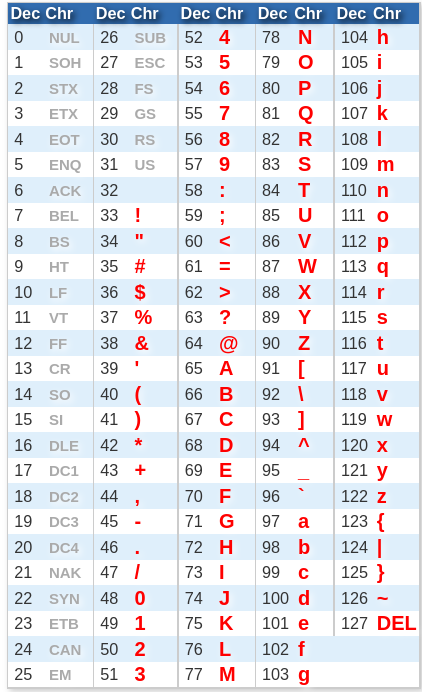

The mathematically inclined among you may notice that there are only 128 values here, but that an 8-bit integer goes up to 255.

That's true. The [extended ASCII table](https://www.lookuptables.com/text/extended-ascii-table) shows us the rest!

We'll leave aside [unicode](https://www.lookuptables.com/text/unicode-characters) for now.

Point is, each character is in fact a number in disguise! But you might also notice that some of those characters (0-32) are not "printable" in the normal sense. But we need some way of representing them! That's what **bytestrings** are all about. They give us a way of showing _all_ the characters in a sequence of bytes, not just the ones that we can print normally.

Just as `ord()` gives us the numerical representation of a string, `chr()` converts a number to a character. We can use this to test what happens for different values.

Let's start by getting the numerical value for `A`:

In [2]:
ord("A")

65

And now, let's convert it back:

In [3]:
chr(65)

'A'

Simple, right? Now let's try one of those unprintable characters like, `0`.

In [4]:
chr(0)

'\x00'

Whoah! What just happened? What is that? It's a string, but `chr()` added some stuff to it! That's a string representation of a bytestring! But how can we make a bytestring directly?

Just like `int()` and `str()` there is also a `bytes()` that will create a bytestring, and also show us the easy way. `bytes()` is cool because it takes just about any kind of input.

In [5]:
bytes?

Init signature: bytes(self, /, *args, **kwargs)
Docstring:     
bytes(iterable_of_ints) -> bytes
bytes(string, encoding[, errors]) -> bytes
bytes(bytes_or_buffer) -> immutable copy of bytes_or_buffer
bytes(int) -> bytes object of size given by the parameter initialized with null bytes
bytes() -> empty bytes object

Construct an immutable array of bytes from:
  - an iterable yielding integers in range(256)
  - a text string encoded using the specified encoding
  - any object implementing the buffer API.
  - an integer
Type:           type
Subclasses:     

Let's try it first with the iterable (list) of integers.

In [6]:
# A single byte
bytes([65])

b'A'

In [7]:
# Two bytes
bytes([65, 0])

b'A\x00'

A lot just happened. First, we created a new bytestring out of a single integer, which became `b'A'`. That `b` is the secret easy way to create bytestrings! We can use that to make our own without the `bytes()` constructor.

In [8]:
# Create a bytestring quickly
bytestring = b"I'm made of bytes!"
print(bytestring)
type(bytestring)

b"I'm made of bytes!"


bytes

When we gave `bytes()` the `0` as well as the `65`, we got back `b'A\x00`. The `\x` is Python's way of saying, "Hey this isn't printable, so recognize this as the numerical representation of that character." Why `\x`? Because the number is in he`x`adecimal. 

We're going to assume at this point that you're familiar with hexademical values. But if you need a refresher, [check this out](https://www.khanacademy.org/computing/computers-and-internet/xcae6f4a7ff015e7d:digital-information/xcae6f4a7ff015e7d:hexadecimal-numbers/a/hexadecimal-numbers).

### Encode/Decode

You might have noticed that if we give `bytes()` a `str`, we _also_ have to give it an "encoding," whatever that is. Basically, it's a translation table that informs Python how to represent the bytes as characters. Normally, we'll use `utf-8` for **Unicode Transformation Format, 8 Bit (Extended ASCII)**. Let's try it:

In [9]:
# Create a bytestring from a str by providing an encoding
bytes("ABC", "utf-8")

b'ABC'

Moving between `str` and `bytes` is pretty common in Python, and in fact _why we took this little detour_.

The important thing to remember is that **encoding** produces a bytestring and **decoding** produces a str.

`bytes` objects have a `decode()` method, and `str`s have an `encode()` that defaults to `utf-8`.

In [10]:
# Move from bytes to str via decode()
b"\x41\x42\x43".decode()

'ABC'

In [11]:
# Same thing, but with regular character representation
b"ABC".decode()

'ABC'

In [12]:
# And back to bytes
"ABC".encode()

b'ABC'

## Actually Using the File Upload Widget

**OKAY**. You might be wondering why we spent SO MUCH TIME talking about `bytes` in this lesson about the File Upload widget. In addition to it being a good time to discuss `bytes`...

The reason we went through all of this is because **The File Upload Widget Stores file contents as `bytes`**!

So with an understanding of `bytes`, we can finally use this thing.

In [13]:
# Import what we need
from IPython.display import display
import ipywidgets as widgets

You'll notice that there's a sample `indicators.txt` in this folder for you to upload. Toss it in there!

In [14]:
# Create the File Upload widget
upload = widgets.FileUpload()
display(upload)

FileUpload(value=(), description='Upload')

⬆️ That's what all this fuss was about! Can you believe it?!

The File Upload widget has 2 optional parameters: `accept`, which takes a `str` of comma separated [MIME types](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types/Common_types) or file extensions like `.txt` to accept; and `multiple`, which defaults to `False`, but when made `True` allows the widget to accept multiple upload selections.

With that file uploaded, let's check out the widget's value:

In [17]:
# Get the upload value
upload.value

({'name': 'indicators.txt',
  'type': 'text/plain',
  'size': 45,
  'content': <memory at 0x7f90b063dcc0>,
  'last_modified': datetime.datetime(2022, 10, 2, 4, 25, 27, 594000, tzinfo=datetime.timezone.utc)},)

What are we looking at here? The data is a nested dictionary, with a single top-level key: the name of the uploaded file. If we had uploaded multiple files, each would would have its own key.

Inside that key are two more: `metadata` and `content`. The `metadata` key contains yet another dictionary of information about the file. At long last, the `content` key contains the file's contents. In what format?

Well well well, look at that: a bytestring.

But now, we know how to get the data as a string!

In [38]:
# Get the file contents as a string
indicators: str = bytes(upload.value[0]["content"]).decode()
indicators

'example.com\n192.168.9.10\nhttps://example.com\n'

Cool, so we have a string. But when we pull in a multiline file as a (byte)string, the line breaks become `\n` characters. That might be okay, but commonly we'll want each line as its own thing, meaning converting the single string into a list. Luckily, `str`s have a built-in method, `split()`, which can turn a single string into a list by separating on a specific pattern.

In [ ]:
# Get the file contents as a list using split()
indicators: [str] = upload.value["indicators.txt"]["content"].decode().split("\n")
indicators

One extra gotcha. See that last empty string in the list? To sort that out, we'll use the `strip()` method _before_ `split()` to remove the trailing newline before turning the string into a list.

In [ ]:
# Get the file contents as a list using strip() to remove the trailing newline, then split() 
indicators: [str] = upload.value["indicators.txt"]["content"].decode().strip().split("\n")
indicators

_Et voilà_! We have a nice list of indicators.

Now, if only we had some way of **class**ifying them...

I know this was a long journey for a single widget, but a lot goes into making this thing work well. In the next lesson, we'll put this thing to use in making a real tool!